In [3]:
#All the important libraties have been imported for various operations
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.model_selection import *
from sklearn.linear_model import *
import sys
import torch 
from pytorch_pretrained_bert import *
from torch import *
from keras.preprocessing.sequence import *
from torch.utils.data import *
from torch.optim import *
from torch.nn.utils import *
from IPython.display import *
%matplotlib inline



In [5]:
#Path of the file has been set and a dataframe has been made
path = "/Users/shashankashekharsharma/Desktop/Codes/IMDB-Movies-Dataset/imdb_top_1000.csv"
df=pd.read_csv(r"/Users/shashankashekharsharma/Desktop/Codes/IMDB-Movies-Dataset/imdb_top_1000.csv")

In [11]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [18]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [11]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [12]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
print("The shape of the dataset is: {} rows and {} columns".format(df.shape[0], df.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


In [9]:
df.corr()

/var/folders/3_/wvtkd4ks1s58828jvy9kssb80000gn/T/ipykernel_20877/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IMDB_Rating,Meta_score,No_of_Votes
IMDB_Rating,1.000000,0.268531,0.494979
Meta_score,0.268531,1.000000,-0.018507
No_of_Votes,0.494979,-0.018507,1.000000


In [10]:
df.describe(include = ['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [22]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
oldest_movie_index = df['Released_Year'].idxmin()
newest_movie_index = df['Released_Year'].idxmax()
print("Information for the Oldest Movie:")
print(df.loc[oldest_movie_index])
print()
print("--------------------------------------------------------------------------------")
print("\nInformation for the Newest Movie:")
print(df.loc[newest_movie_index])

Information for the Oldest Movie:
Poster_Link      https://m.media-amazon.com/images/M/MV5BNWJiNG...
Series_Title                          Das Cabinet des Dr. Caligari
Released_Year                                               1920.0
Certificate                                                    NaN
Runtime                                                     76 min
Genre                                     Fantasy, Horror, Mystery
IMDB_Rating                                                    8.1
Overview         Hypnotist Dr. Caligari uses a somnambulist, Ce...
Meta_score                                                     NaN
Director                                              Robert Wiene
Star1                                                Werner Krauss
Star2                                                 Conrad Veidt
Star3                                              Friedrich Feher
Star4                                                  Lil Dagover
No_of_Votes                 

In [29]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
oldest_movie_index = df['Released_Year'].idxmin()
newest_movie_index = df['Released_Year'].idxmax()
print("Information for the Oldest Movie:")
print("--------------------------------------------------------------------------------")
print(df.loc[oldest_movie_index])
print("--------------------------------------------------------------------------------")
print("\nInformation for the Newest Movie:")
print("--------------------------------------------------------------------------------")
print(df.loc[newest_movie_index])
print("--------------------------------------------------------------------------------")

Information for the Oldest Movie:
--------------------------------------------------------------------------------
Poster_Link      https://m.media-amazon.com/images/M/MV5BNWJiNG...
Series_Title                          Das Cabinet des Dr. Caligari
Released_Year                                               1920.0
Certificate                                                    NaN
Runtime                                                        NaN
Genre                                     Fantasy, Horror, Mystery
IMDB_Rating                                                    8.1
Overview         Hypnotist Dr. Caligari uses a somnambulist, Ce...
Meta_score                                                     NaN
Director                                              Robert Wiene
Star1                                                Werner Krauss
Star2                                                 Conrad Veidt
Star3                                              Friedrich Feher
Star4         

In [28]:
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
oldest_movie_index = df['IMDB_Rating'].idxmin()
newest_movie_index = df['IMDB_Rating'].idxmax()
print("Information for the Best Rated Movie:")
print("--------------------------------------------------------------------------------")
print(df.loc[oldest_movie_index])
print("--------------------------------------------------------------------------------")
print("\nInformation for Lowest Rated Movie:")
print("--------------------------------------------------------------------------------")
print(df.loc[newest_movie_index])
print("--------------------------------------------------------------------------------")

Information for the Longest Movie:
--------------------------------------------------------------------------------
Poster_Link      https://m.media-amazon.com/images/M/MV5BODQ0M2...
Series_Title                                           Dark Waters
Released_Year                                               2019.0
Certificate                                                  PG-13
Runtime                                                        NaN
Genre                                    Biography, Drama, History
IMDB_Rating                                                    7.6
Overview         A corporate defense attorney takes on an envir...
Meta_score                                                    73.0
Director                                               Todd Haynes
Star1                                                 Mark Ruffalo
Star2                                                Anne Hathaway
Star3                                                  Tim Robbins
Star4        

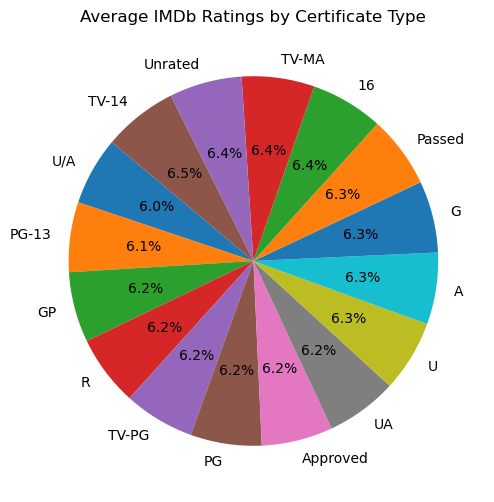

In [12]:
average_ratings = df.groupby('Certificate')['IMDB_Rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.pie(average_ratings, labels=average_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average IMDb Ratings by Certificate Type')
plt.show()


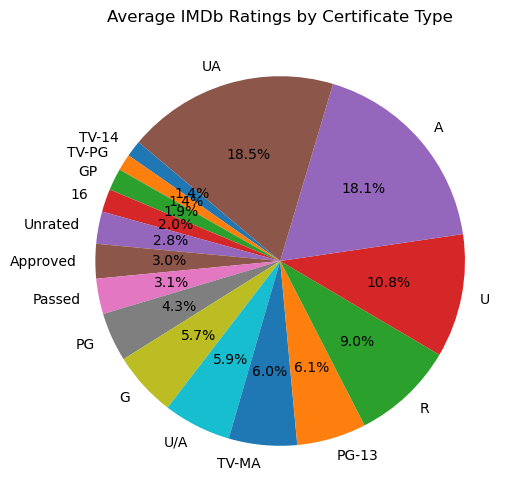

In [13]:
average_ratings = df.groupby('Certificate')['No_of_Votes'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.pie(average_ratings, labels=average_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average IMDb Ratings by Certificate Type')
plt.show()